### import library

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

### membaca data

In [ ]:
filepath = 'Country-data.csv'
country_df = pd.read_csv(filepath)

### understanding data

In [ ]:
#melihat jumlah baris dan kolom data
country_df.shape


(167, 10)

In [ ]:
#melihat kolom yang ada pada data
country_df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [ ]:
#melihat 6 data secara random
country_df.sample(6)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
106,Mozambique,101.0,31.5,5.21,46.2,918,7.640,54.5,5.56,419
95,Malaysia,7.9,86.9,4.39,71.0,21100,7.270,74.5,2.15,9070
100,Mauritius,15.0,51.2,6.00,62.2,15900,1.130,73.4,1.57,8000
102,Moldova,17.2,39.2,11.70,78.5,3910,11.100,69.7,1.27,1630
70,Indonesia,33.3,24.3,2.61,22.4,8430,15.300,69.9,2.48,3110
53,Finland,3.0,38.7,8.95,37.4,39800,0.351,80.0,1.87,46200


In [ ]:
#melihat statistik data
country_df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [ ]:
country_df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

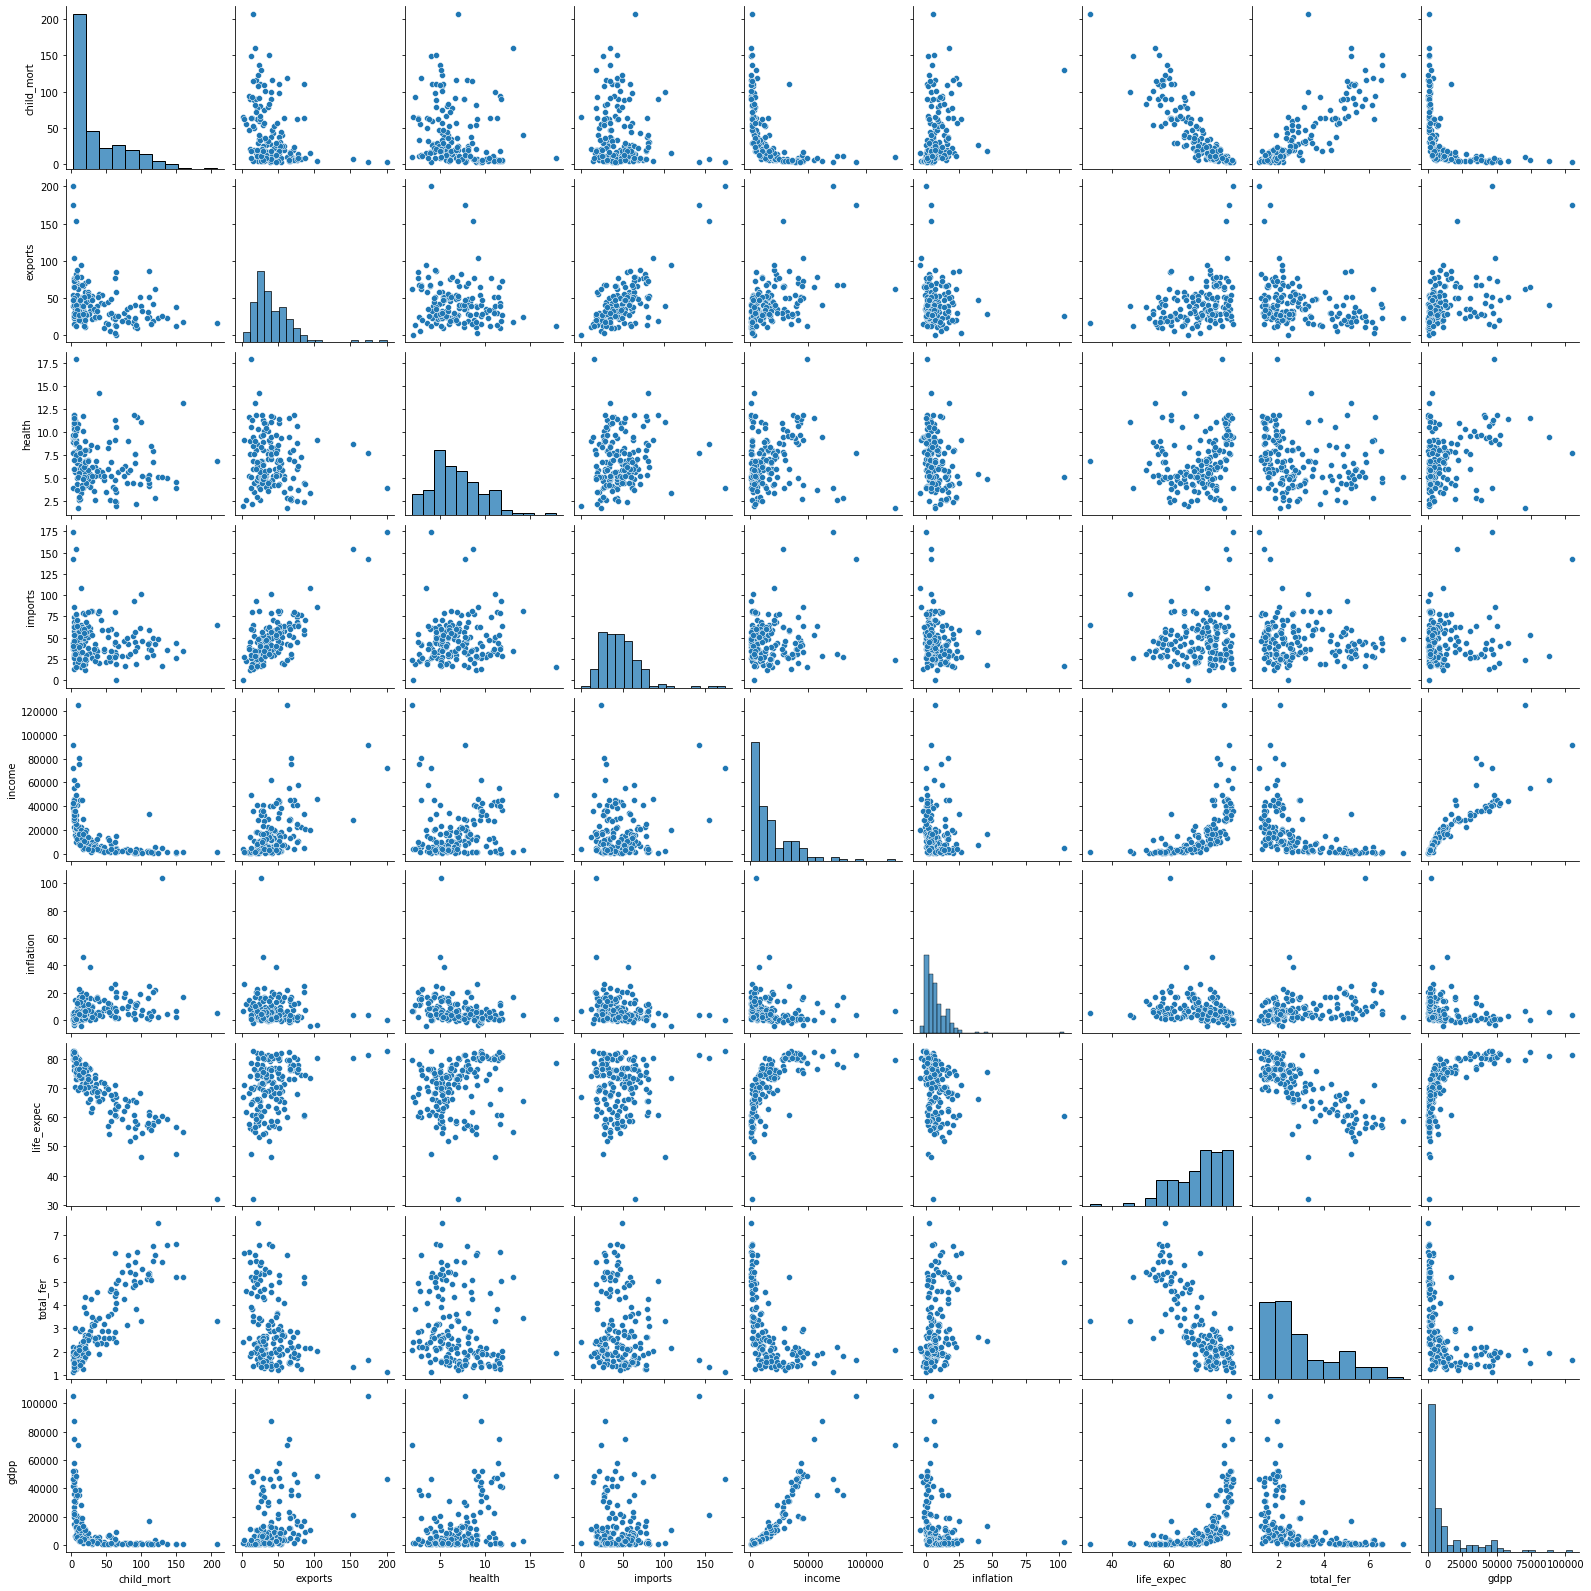

In [ ]:
# menampilkan scaterplot hubungan tiap kolom
sns.pairplot(country_df)

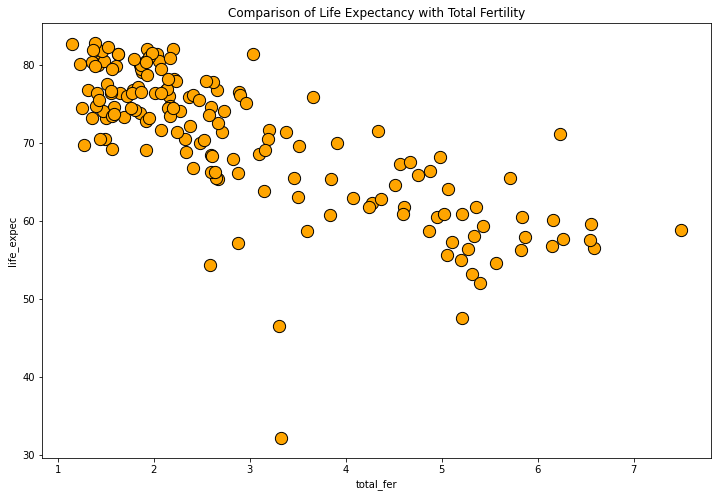

In [ ]:
plt.figure(figsize=(12,8))

sns.scatterplot(
    x=country_df['total_fer'], 
    y=country_df['life_expec'], 
    s=150,
    color='orange',
    edgecolor='black'
)

plt.title('Comparison of Life Expectancy with Total Fertility')
plt.savefig('ScatterPlot.png')
plt.show()

# analisis 1 : Total fertility and life expectancy

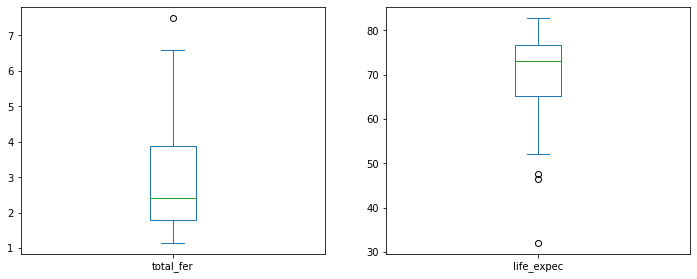

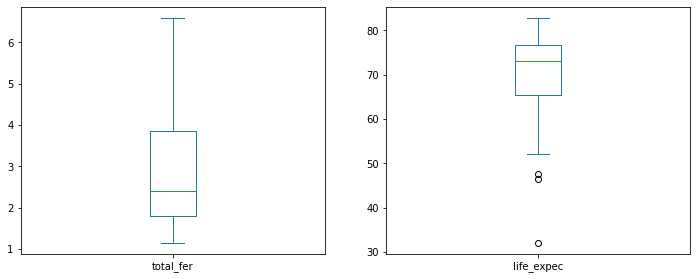

In [ ]:
data = country_df[['total_fer', 'life_expec']]
data.plot(kind='box', subplots=True, layout=(2,2), figsize=(12,10))
plt.show()

def remove_outlier(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    df_final = df[~(df>(Q1-(1.5*IQR))) | (df<(Q3+(1.5*IQR)))]
    
    return df_final

df = remove_outlier(country_df[['total_fer', 'life_expec']])

df.dropna(axis=0, inplace=True)
df.plot(kind='box', subplots=True, layout=(2,2), figsize=(12,10))
plt.savefig('before After_Outliers _ Version _ Life_Expectancy.png')
plt.show()

In [ ]:
#scaling data
sc = StandardScaler()
df_std1 = sc.fit_transform(df)

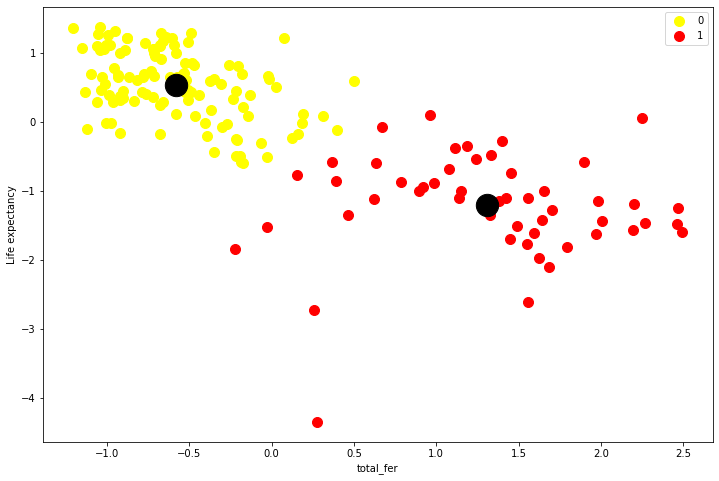

In [ ]:
kmeans1 = KMeans(n_clusters=2, random_state=42).fit(df_std1)
labels1 = kmeans1.labels_
centers = kmeans1.cluster_centers_

new_df1 = pd.DataFrame(data = df_std1, columns = ['total_fer', 'life_expec'])
new_df1['label_kmeans1'] = labels1

plt.figure(figsize=(12,8))
plt.scatter(new_df1['total_fer'][new_df1.label_kmeans1 == 0], new_df1['life_expec'][new_df1.label_kmeans1 == 0],c = 'yellow',s = 100,label = 0,edgecolors = 'yellow')
plt.scatter(new_df1['total_fer'][new_df1.label_kmeans1 == 1], new_df1['life_expec'][new_df1.label_kmeans1 == 1],c = 'red',s = 100,label = 1,edgecolors = 'red')

plt.scatter(centers[:, 0],centers[:, 1],c = 'black',s = 500)


plt.xlabel('total_fer')
plt.ylabel('Life expectancy')
plt.legend()
plt.show()

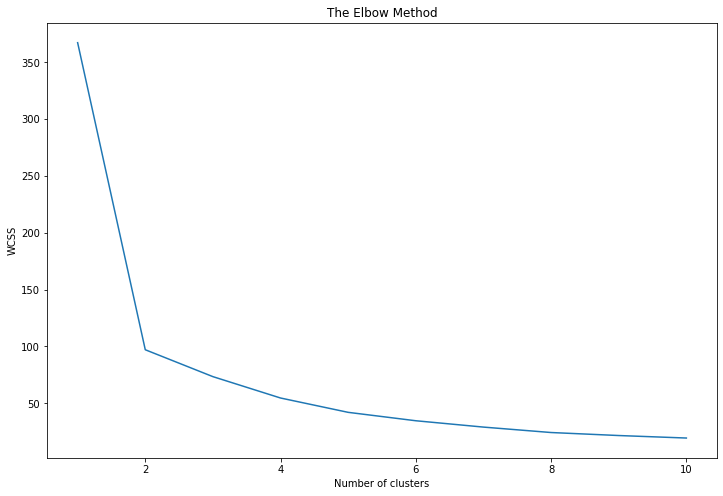

In [ ]:
# Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(new_df1)
    wcss.append(kmeans.inertia_)
    
plt.figure(figsize=(12,8))
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

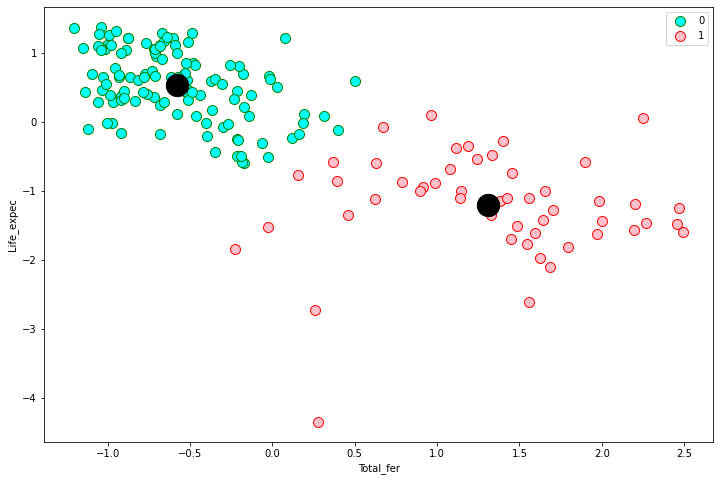

In [ ]:
# clustering using n_clusters = 2
kmeans2 = KMeans(n_clusters=2, init='k-means++', random_state=42).fit(df_std1)
labels2 = kmeans2.labels_
centers = kmeans2.cluster_centers_
new_df1['label_kmeans2'] = labels2

plt.figure(figsize=(12,8))
plt.scatter(new_df1['total_fer'][new_df1.label_kmeans2 == 0], new_df1['life_expec'][new_df1.label_kmeans2 == 0], c = 'cyan', s = 100, label = 0, edgecolors = 'green')
plt.scatter(new_df1['total_fer'][new_df1.label_kmeans2 == 1], new_df1['life_expec'][new_df1.label_kmeans2 == 1], c = 'pink', s = 100, label = 1, edgecolors = 'red')



plt.scatter(
    centers[:, 0],
    centers[:, 1],
    c = 'black',
    s = 500
)

plt.xlabel('Total_fer')
plt.ylabel('Life_expec')
plt.legend()
plt.savefig('analisis1.png')
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score

print(silhouette_score(df_std1, labels= labels1))
print(silhouette_score(df_std1, labels= labels2))

0.635271826088425
0.635271826088425


In [ ]:
new_df1['label2_kmeans'] = labels2
country_df['K_means_labels'] = pd.Series(labels2).astype('object')

top5_countries = country_df[country_df['K_means_labels'] == 1]
top5_countries = top5_countries.sort_values(by=['life_expec', 'total_fer'],ascending=True)[:10].reset_index(drop=True)
top5_countries[['country', 'life_expec']]

,country,life_expec
0,Haiti,32.1
1,Lesotho,46.5
2,Central African Republic,47.5
3,Malawi,53.1
4,Mozambique,54.5
5,Guinea-Bissau,55.6
6,Afghanistan,56.2
7,Cote d'Ivoire,56.3
8,Chad,56.5
9,Botswana,57.1


## Analisis 2 : child mort and life expectancy

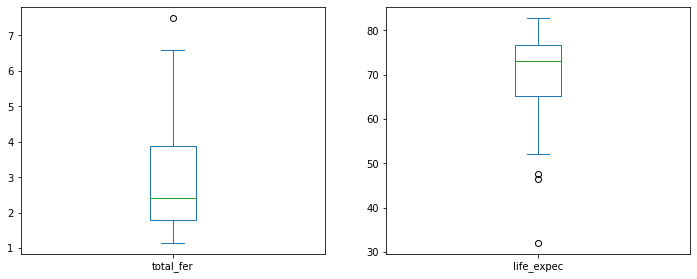

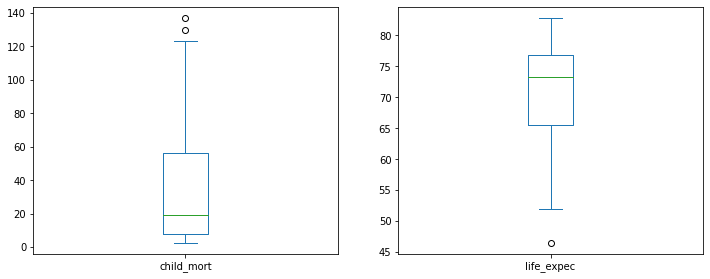

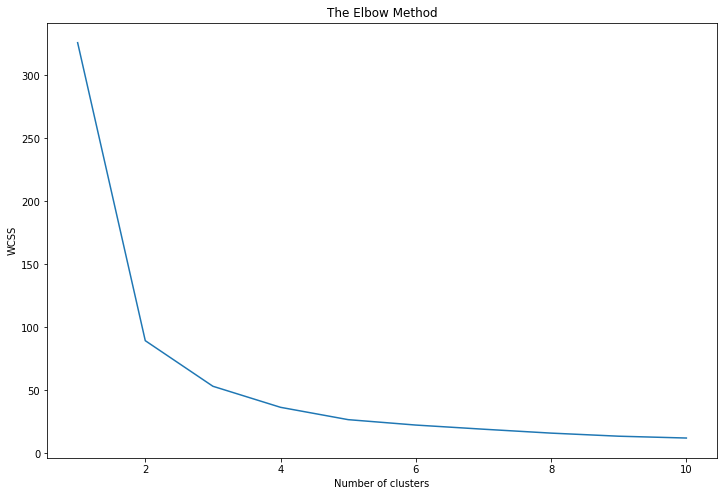

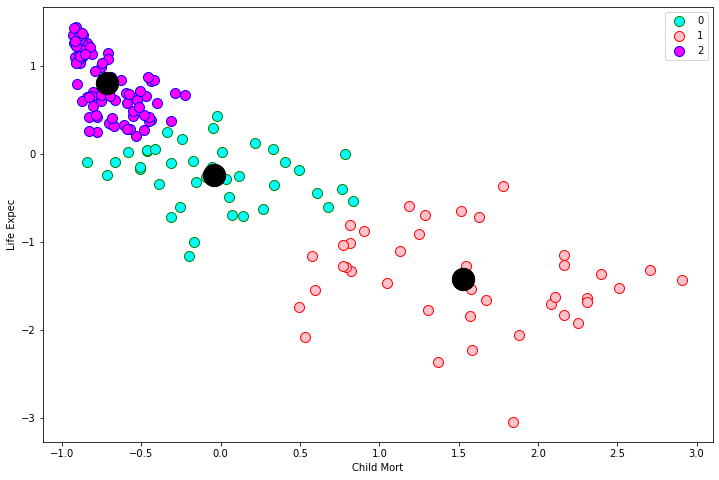

In [ ]:
ata = country_df[['child_mort', 'life_expec']]
data.plot(kind='box', subplots=True, layout=(2,2), figsize=(12,10))
plt.show()

def remove_outlier(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    df_final = df[~(df>(Q1-(1.5*IQR))) | (df<(Q3+(1.5*IQR)))]
    
    return df_final

df = remove_outlier(country_df[['child_mort', 'life_expec']])

df.dropna(axis=0, inplace=True)
df.plot(kind='box', subplots=True, layout=(2,2), figsize=(12,10))
plt.show()

# Scaling Data
sc = StandardScaler()
df_std2 = sc.fit_transform(df)

# KMeans proses
new_df2 = pd.DataFrame(data = df_std2, columns = ['child_mort', 'life_expec'])

# Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(new_df2)
    wcss.append(kmeans.inertia_)
    
plt.figure(figsize=(12,8))
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# clustering using n_clusters = 3
kmeans2 = KMeans(n_clusters=3, init='k-means++', random_state=42).fit(df_std2)
labels2 = kmeans2.labels_
centers = kmeans2.cluster_centers_
new_df2['label_kmeans2'] = labels2

plt.figure(figsize=(12,8))
plt.scatter(new_df2['child_mort'][new_df2.label_kmeans2 == 0], new_df2['life_expec'][new_df2.label_kmeans2 == 0], c = 'cyan', s = 100, label = 0, edgecolors = 'green')
plt.scatter(new_df2['child_mort'][new_df2.label_kmeans2 == 1], new_df2['life_expec'][new_df2.label_kmeans2 == 1], c = 'pink', s = 100, label = 1, edgecolors = 'red')
plt.scatter(new_df2['child_mort'][new_df2.label_kmeans2 == 2], new_df2['life_expec'][new_df2.label_kmeans2 == 2], c = 'magenta', s = 100, label = 2, edgecolors = 'blue')



plt.scatter(
    centers[:, 0],
    centers[:, 1],
    c = 'black',
    s = 500
)

plt.xlabel('Child Mort')
plt.ylabel('Life Expec')
plt.legend()
plt.savefig('analisis2.png')
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score

print(silhouette_score(df_std2, labels= labels2))

new_df2['label2_kmeans'] = labels2
country_df['K_means_labels'] = pd.Series(labels2).astype('object')

top5_countries = country_df[country_df['K_means_labels'] == 1]
top5_countries = top5_countries.sort_values(by=['child_mort'],ascending=False)[:10].reset_index(drop=True)
top5_countries[['country', 'child_mort']]

0.5078271946924935


,country,child_mort
0,Nigeria,130.0
1,Angola,119.0
2,Burkina Faso,116.0
3,Benin,111.0
4,Cameroon,108.0
5,Burundi,93.6
6,Malawi,90.5
7,Afghanistan,90.2
8,Comoros,88.2
9,Lao,78.9


## analisis 3 : GDP/capita and life expectancy

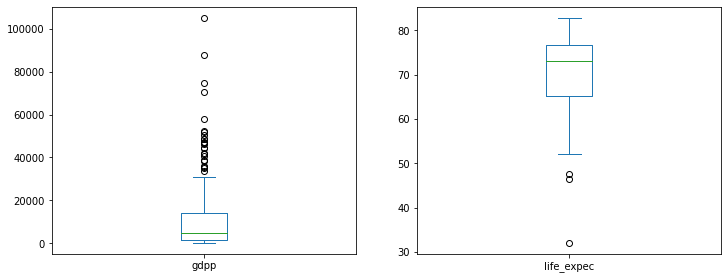

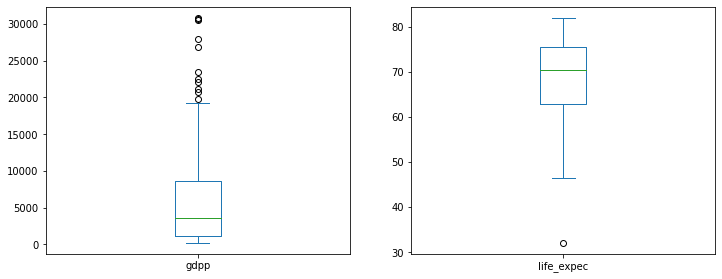

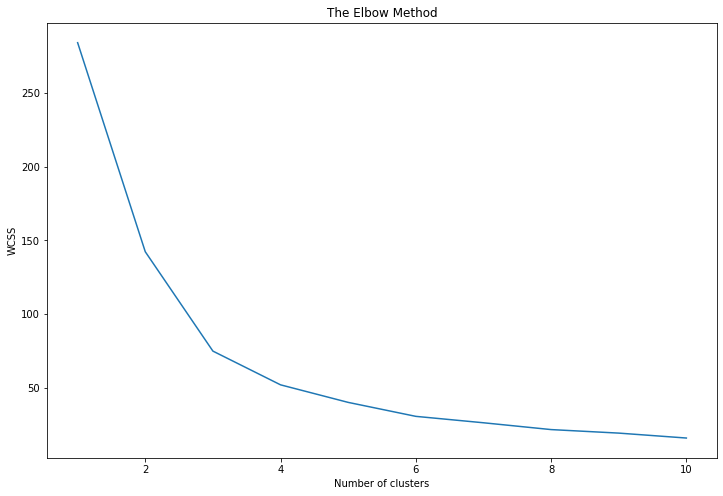

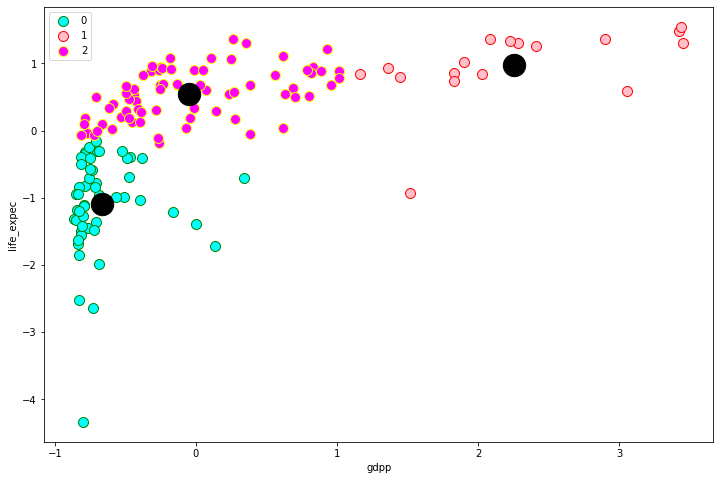

In [ ]:
data = country_df[['gdpp', 'life_expec']]
data.plot(kind='box', subplots=True, layout=(2,2), figsize=(12,10))
plt.show()

def remove_outlier(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    df_final = df[~(df>(Q1-(1.5*IQR))) | (df<(Q3+(1.5*IQR)))]
    
    return df_final

df = remove_outlier(country_df[['gdpp', 'life_expec']])

df.dropna(axis=0, inplace=True)
df.plot(kind='box', subplots=True, layout=(2,2), figsize=(12,10))
plt.show()

# Scaling Data
sc = StandardScaler()
df_std3 = sc.fit_transform(df)

# KMeans proses
new_df3 = pd.DataFrame(data = df_std3, columns = ['gdpp', 'life_expec'])

# Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(new_df3)
    wcss.append(kmeans.inertia_)
    
plt.figure(figsize=(12,8))
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# clustering using n_clusters = 3
kmeans2 = KMeans(n_clusters=3, init='k-means++', random_state=42).fit(df_std3)
labels2 = kmeans2.labels_
centers = kmeans2.cluster_centers_
new_df3['label_kmeans2'] = labels2

plt.figure(figsize=(12,8))
plt.scatter(new_df3['gdpp'][new_df3.label_kmeans2 == 0], new_df3['life_expec'][new_df3.label_kmeans2 == 0], c = 'cyan', s = 100, label = 0, edgecolors = 'green')
plt.scatter(new_df3['gdpp'][new_df3.label_kmeans2 == 1], new_df3['life_expec'][new_df3.label_kmeans2 == 1], c = 'pink', s = 100, label = 1, edgecolors = 'red')
plt.scatter(new_df3['gdpp'][new_df3.label_kmeans2 == 2], new_df3['life_expec'][new_df3.label_kmeans2 == 2], c = 'magenta', s = 100, label = 2, edgecolors = 'yellow')



plt.scatter(
    centers[:, 0],
    centers[:, 1],
    c = 'black',
    s = 500
)

plt.xlabel('gdpp')
plt.ylabel('life_expec')
plt.legend()
plt.savefig('analisis3.png')
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score

print(silhouette_score(df_std3, labels= labels2))

new_df3['label2_kmeans'] = labels2
country_df['K_means_labels'] = pd.Series(labels2).astype('object')

top5_countries = country_df[country_df['K_means_labels'] == 1]
top5_countries = top5_countries.sort_values(by=['gdpp'],ascending=True)[:10].reset_index(drop=True)
top5_countries[['country', 'gdpp']]


0.4948528332797245


,country,gdpp
0,"Congo, Dem. Rep.",334
1,Nepal,592
2,Guinea,648
3,Mali,708
4,Kyrgyz Republic,880
5,"Congo, Rep.",2740
6,Paraguay,3230
7,Peru,5020
8,Dominican Republic,5450
9,Azerbaijan,5840


## Analisis 4 : GDP/capita and health

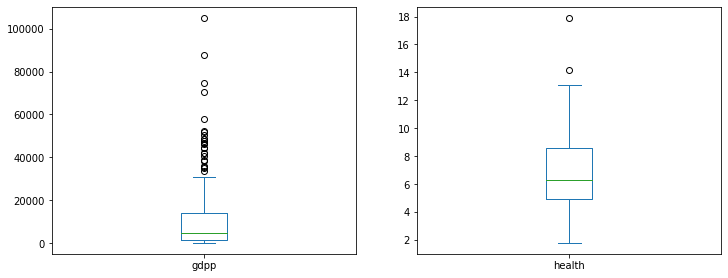

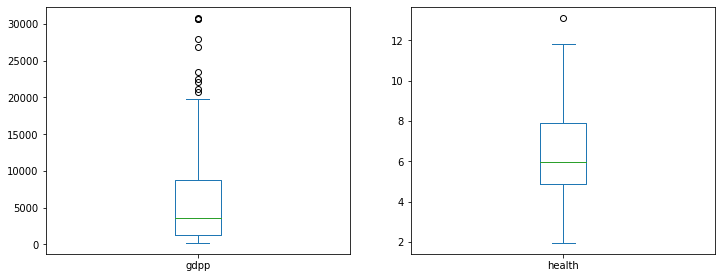

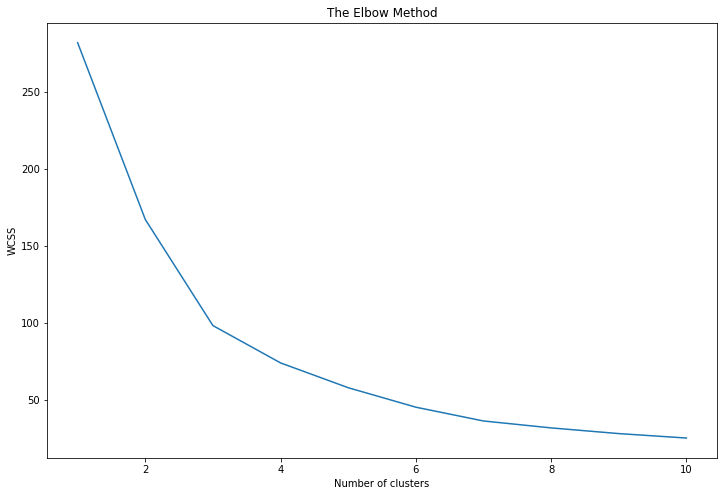

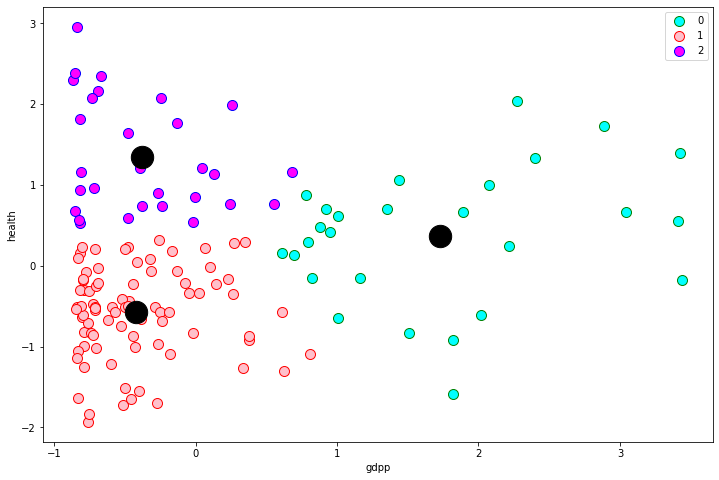

In [ ]:
data = country_df[['gdpp', 'health']]
data.plot(kind='box', subplots=True, layout=(2,2), figsize=(12,10))
plt.show()

def remove_outlier(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    df_final = df[~(df>(Q1-(1.5*IQR))) | (df<(Q3+(1.5*IQR)))]
    
    return df_final

df = remove_outlier(country_df[['gdpp', 'health']])

df.dropna(axis=0, inplace=True)
df.plot(kind='box', subplots=True, layout=(2,2), figsize=(12,10))
plt.show()

# Scaling Data
sc = StandardScaler()
df_std4 = sc.fit_transform(df)

# KMeans proses
new_df4 = pd.DataFrame(data = df_std4, columns = ['gdpp', 'health'])

# Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(new_df4)
    wcss.append(kmeans.inertia_)
    
plt.figure(figsize=(12,8))
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# clustering using n_clusters = 3
kmeans2 = KMeans(n_clusters=3, init='k-means++', random_state=42).fit(df_std4)
labels2 = kmeans2.labels_
centers = kmeans2.cluster_centers_
new_df4['label_kmeans2'] = labels2

plt.figure(figsize=(12,8))
plt.scatter(new_df4['gdpp'][new_df4.label_kmeans2 == 0], new_df4['health'][new_df4.label_kmeans2 == 0], c = 'cyan', s = 100, label = 0, edgecolors = 'green')
plt.scatter(new_df4['gdpp'][new_df4.label_kmeans2 == 1], new_df4['health'][new_df4.label_kmeans2 == 1], c = 'pink', s = 100, label = 1, edgecolors = 'red')
plt.scatter(new_df4['gdpp'][new_df4.label_kmeans2 == 2], new_df4['health'][new_df4.label_kmeans2 == 2], c = 'magenta', s = 100, label = 2, edgecolors = 'blue')



plt.scatter(
    centers[:, 0],
    centers[:, 1],
    c = 'black',
    s = 500
)

plt.xlabel('gdpp')
plt.ylabel('health')
plt.legend()
plt.savefig('analisis4.png')
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score

print(silhouette_score(df_std4, labels= labels2))

new_df4['label2_kmeans'] = labels2
country_df['K_means_labels'] = pd.Series(labels2).astype('object')

top5_countries = country_df[country_df['K_means_labels'] == 2]
top5_countries = top5_countries.sort_values(by=['health'],ascending=False)[:10].reset_index(drop=True)
top5_countries[['country', 'health']]

0.47387520548800216


,country,health
0,Sierra Leone,13.10
1,Netherlands,11.90
2,Liberia,11.80
3,Rwanda,10.50
4,Iceland,9.40
5,Ireland,9.19
6,Brazil,9.01
7,Malta,8.65
8,Argentina,8.10
9,Israel,7.63


## Analisis 5 : Life Expectancy and Income

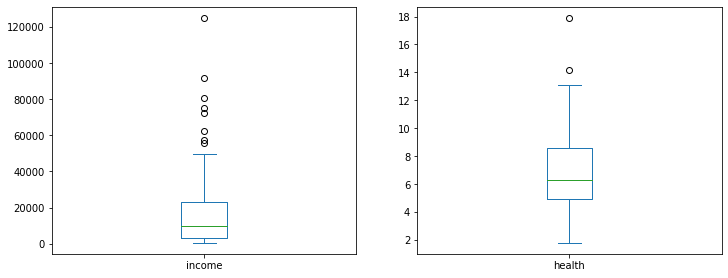

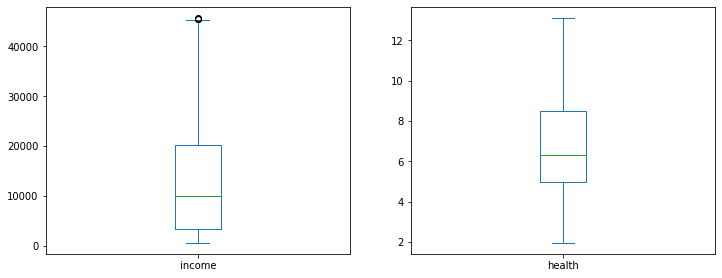

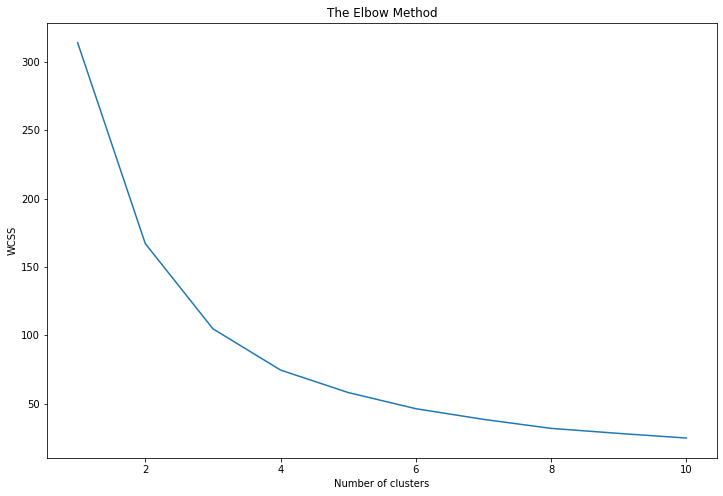

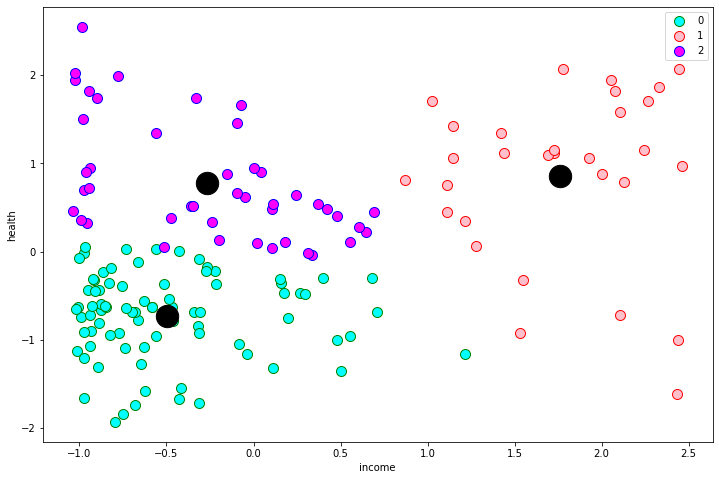

In [ ]:
data = country_df[['income', 'health']]
data.plot(kind='box', subplots=True, layout=(2,2), figsize=(12,10))
plt.show()

def remove_outlier(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    df_final = df[~(df>(Q1-(1.5*IQR))) | (df<(Q3+(1.5*IQR)))]
    
    return df_final

df = remove_outlier(country_df[['income', 'health']])

df.dropna(axis=0, inplace=True)
df.plot(kind='box', subplots=True, layout=(2,2), figsize=(12,10))
plt.show()

# Scaling Data
sc = StandardScaler()
df_std5 = sc.fit_transform(df)

# KMeans proses
new_df5 = pd.DataFrame(data = df_std5, columns = ['income', 'health'])

# Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(new_df5)
    wcss.append(kmeans.inertia_)
    
plt.figure(figsize=(12,8))
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# clustering using n_clusters = 3
kmeans2 = KMeans(n_clusters=3, init='k-means++', random_state=42).fit(df_std5)
labels2 = kmeans2.labels_
centers = kmeans2.cluster_centers_
new_df5['label_kmeans2'] = labels2

plt.figure(figsize=(12,8))
plt.scatter(new_df5['income'][new_df5.label_kmeans2 == 0], new_df5['health'][new_df5.label_kmeans2 == 0], c = 'cyan', s = 100, label = 0, edgecolors = 'green')
plt.scatter(new_df5['income'][new_df5.label_kmeans2 == 1], new_df5['health'][new_df5.label_kmeans2 == 1], c = 'pink', s = 100, label = 1, edgecolors = 'red')
plt.scatter(new_df5['income'][new_df5.label_kmeans2 == 2], new_df5['health'][new_df5.label_kmeans2 == 2], c = 'magenta', s = 100, label = 2, edgecolors = 'blue')




plt.scatter(
    centers[:, 0],
    centers[:, 1],
    c = 'black',
    s = 500
)

plt.xlabel('income')
plt.ylabel('health')
plt.legend()
plt.savefig('analisis5.png')
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score

print(silhouette_score(df_std5, labels= labels2))

new_df5['label2_kmeans'] = labels2
country_df['K_means_labels'] = pd.Series(labels2).astype('object')

top5_countries = country_df[country_df['K_means_labels'] == 2]
top5_countries = top5_countries.sort_values(by=['income'],ascending=True)[:10].reset_index(drop=True)
top5_countries[['country', 'income']]

0.4316976165802936


,country,income
0,Liberia,700
1,Niger,814
2,Guinea,1190
3,Togo,1210
4,Rwanda,1350
5,Comoros,1410
6,Burkina Faso,1430
7,Haiti,1500
8,Afghanistan,1610
9,Gambia,1660
